In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

np.random.seed(1234)

# Step 1: Loading dataset from UCI repository using URL
wholesale_cust_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')

wholesale_cust_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
# Checking the size of the dataset
print ("Wholesale customers dataset has {} samples with {} features each.".format(*wholesale_cust_data.shape))

Wholesale customers dataset has 440 samples with 8 features each.


In [3]:
# Data Exploration 
wholesale_cust_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
# Step 2: Data Pre-processing

# check for missing values
print(wholesale_cust_data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [5]:
# normalizing the data

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(wholesale_cust_data), columns=wholesale_cust_data.columns)

pd.DataFrame(df_normalized).describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Optimal number of clusters: 4


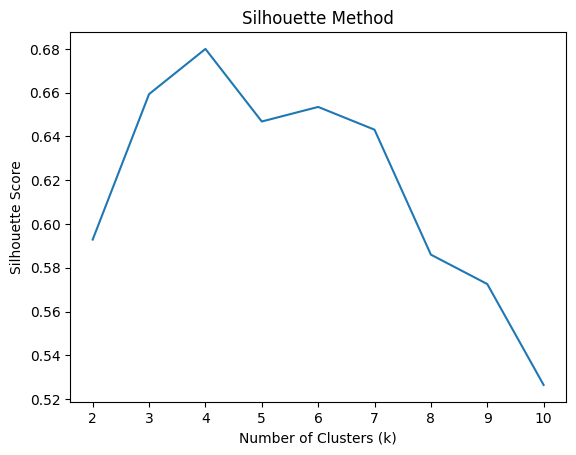

In [6]:
# Step 3: Choosing optimal number of clusters

#Silhouette Method

# Initialize an empty list to store the Silhouette scores for different numbers of clusters
silhouette_scores = []
best_silhouette_score = -1

# Try different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_normalized)
    silhouette_avg = silhouette_score(df_normalized, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        optimal_clusters = k

print("Optimal number of clusters:", optimal_clusters)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [7]:
# K-means

# Step 3: Applying the K-means clustering algorithm 

# Initialize and fit the K-means model with the chosen number of clusters
num_clusters =  optimal_clusters
kmeans = KMeans(n_clusters=num_clusters,n_init=10 ,random_state=42)

# Fit K-means to the preprocessed dataset
kmeans.fit(df_normalized)

# Add the cluster labels to the original DataFrame
wholesale_cust_data['Cluster'] = kmeans.labels_


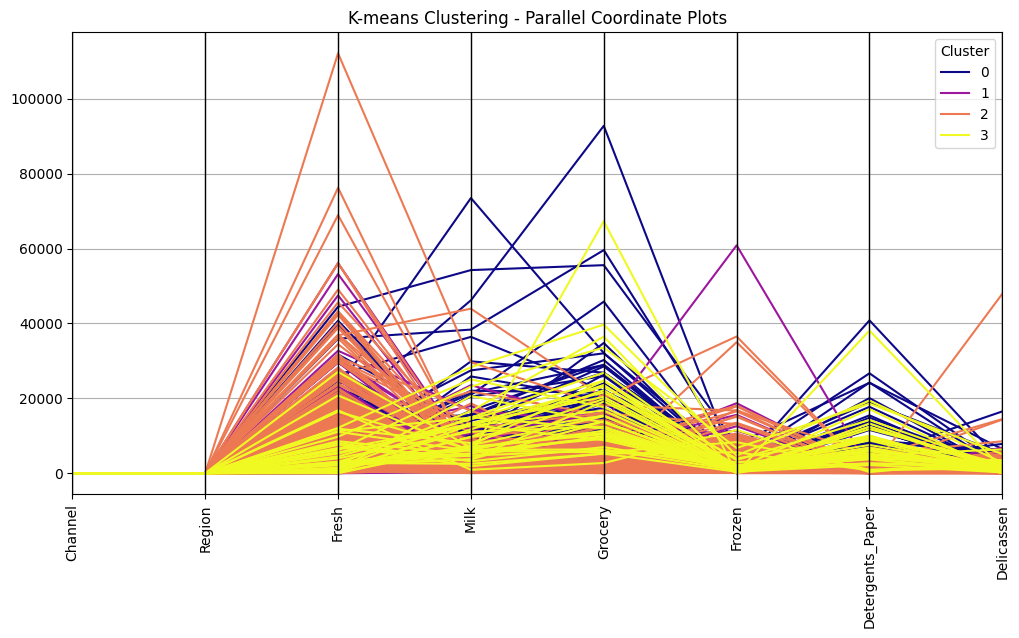

In [8]:
# Step 4: Visualize the results of the clustering algorithm

# Normalize the cluster labels for better visualization
wholesale_cust_data['Cluster'] = wholesale_cust_data['Cluster'].astype('category').cat.codes

sorted_wholesale_cust_data = wholesale_cust_data.sort_values('Cluster')

# Plot parallel coordinate plots for all features
plt.figure(figsize=(12, 6))
parallel_coordinates(sorted_wholesale_cust_data, 'Cluster', colormap='plasma')
plt.xticks(rotation=90)
plt.title('K-means Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()


In [9]:
# Step 5: Evaluating the quality of the clustering results using silhouette coefficient

# Calculate the Silhouette Coefficient
silhouette_avg = silhouette_score(df_normalized, kmeans.labels_)
print(f"Silhouette coefficient: {silhouette_avg}")


Silhouette coefficient: 0.679962733411163


In [10]:
# Step 7: 

# Hierarchical Clustering

# Initialize and fit hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
hierarchical.fit(df_normalized)

# Add cluster labels to the DataFrame
wholesale_cust_data['Hierarchical_Cluster'] = hierarchical.labels_
            

In [11]:
# DBSCAN

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_normalized)

# Add cluster labels to the DataFrame
wholesale_cust_data['DBSCAN_Cluster'] = dbscan.labels_

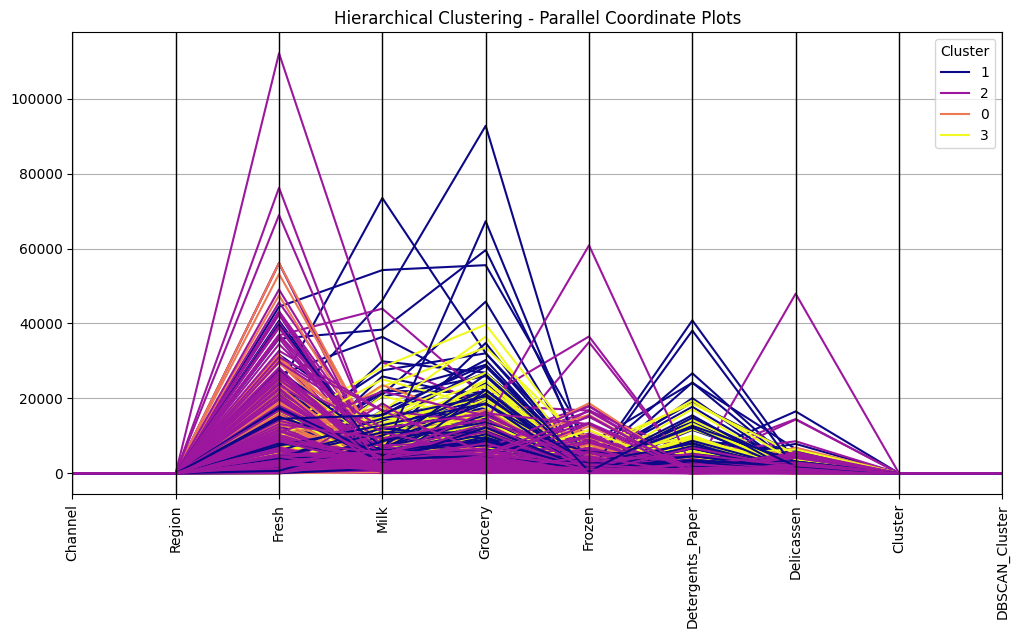

In [12]:
# Visual comparision

plt.figure(figsize=(12, 6))
parallel_coordinates(wholesale_cust_data, 'Hierarchical_Cluster', colormap='plasma')
plt.xticks(rotation=90)
plt.title('Hierarchical Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()

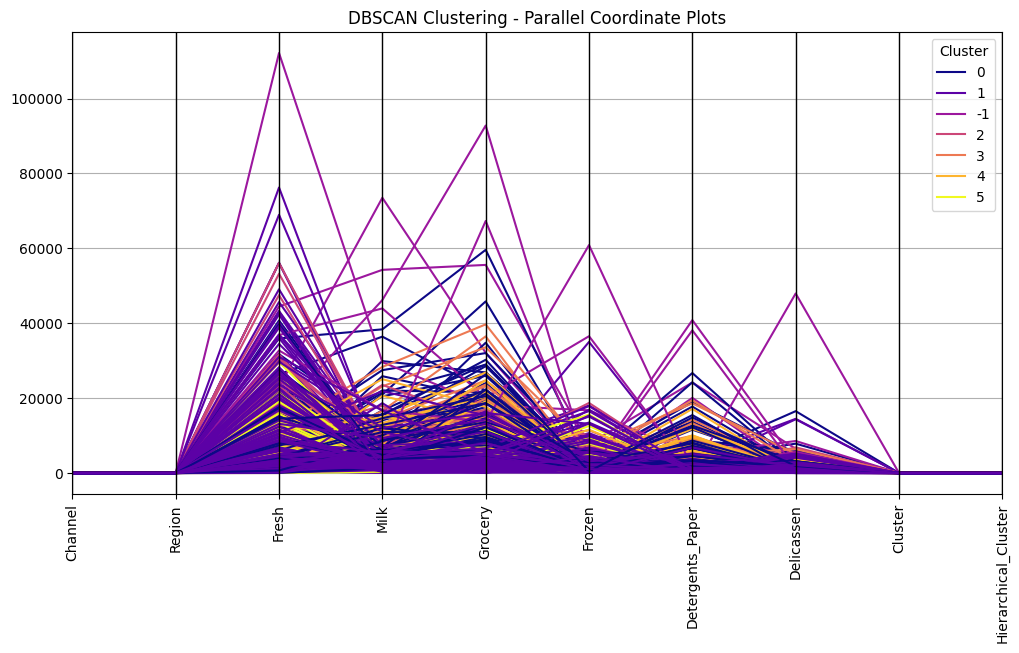

In [13]:
plt.figure(figsize=(12, 6))
parallel_coordinates(wholesale_cust_data, 'DBSCAN_Cluster', colormap='plasma')
plt.xticks(rotation=90)
plt.title('DBSCAN Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()


In [14]:
# Comparing Silhouette Coefficients

kmeans_silhouette = silhouette_score(df_normalized, kmeans.labels_)
hierarchical_silhouette = silhouette_score(df_normalized, hierarchical.labels_)
dbscan_silhouette = silhouette_score(df_normalized, dbscan.labels_)

print("Silhouette Coefficients:")
print("K-means:", kmeans_silhouette)
print("Hierarchical Clustering:", hierarchical_silhouette)
print("DBSCAN:", dbscan_silhouette)


Silhouette Coefficients:
K-means: 0.679962733411163
Hierarchical Clustering: 0.6779590999021476
DBSCAN: 0.6360287841835186


C:\Users\Radhika\AppData\Local\Temp\ipykernel_10392\1529727381.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_summary, x='Category', y='Total_Spending', hue='Channel', palette='viridis', ci=None)


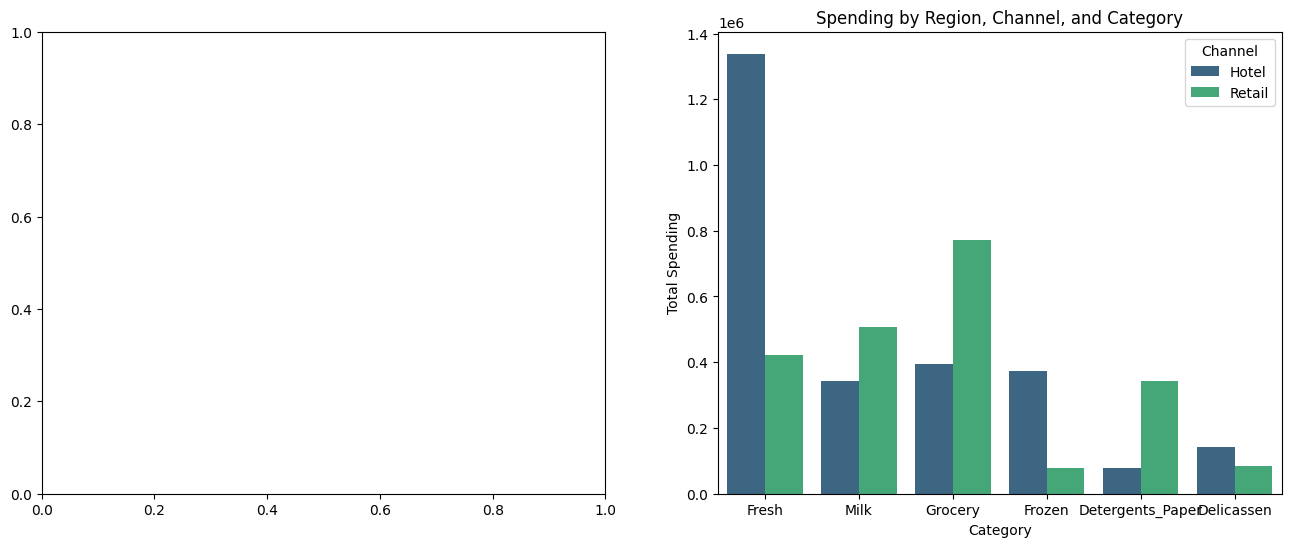

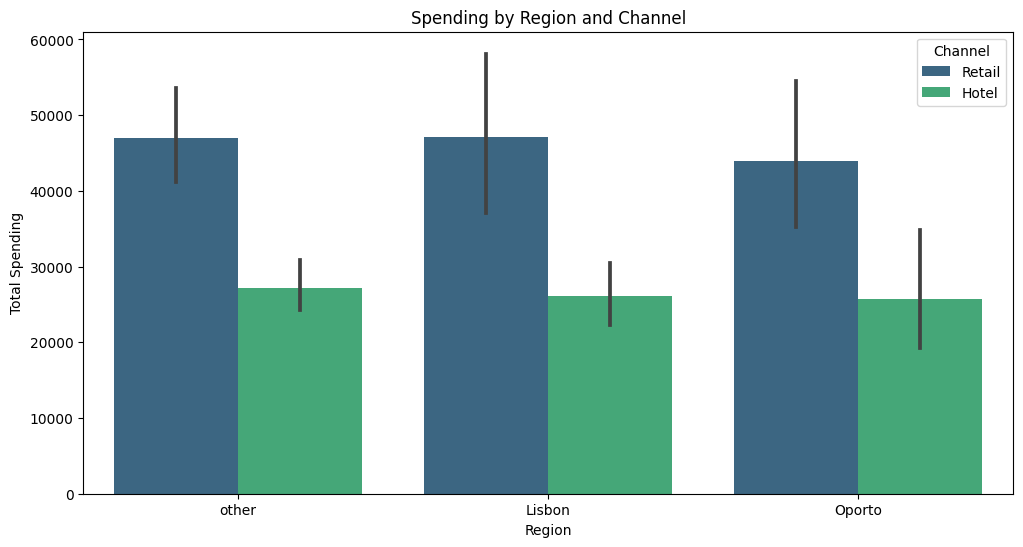

<Figure size 640x480 with 0 Axes>

In [15]:
wholesale_cust_data_subset = wholesale_cust_data.drop(['Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster'], axis=1)

wholesale_cust_data_subset['Channel'] = wholesale_cust_data_subset['Channel'].map({1:'Hotel',2:'Retail'})
wholesale_cust_data_subset['Region'] = wholesale_cust_data_subset['Region'].map({1:'Lisbon',2:'Oporto',3:'other'})

wholesale_cust_data_subset['Total_Spending'] = wholesale_cust_data_subset['Fresh'] + wholesale_cust_data_subset['Milk'] + wholesale_cust_data_subset['Grocery'] + wholesale_cust_data_subset['Frozen'] + wholesale_cust_data_subset['Detergents_Paper'] + wholesale_cust_data_subset['Delicassen']

# Prepare the data for visualization
spending_summary = wholesale_cust_data_subset.groupby(['Region', 'Channel']).sum().stack().reset_index()
spending_summary.columns = ['Region', 'Channel', 'Category', 'Total_Spending']

# Create the grouped bar plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Filter out the 'Total Spending' category
filtered_summary = spending_summary[spending_summary['Category'] != 'Total_Spending']

# Create the bar plot
sns.barplot(data=filtered_summary, x='Category', y='Total_Spending', hue='Channel', palette='viridis', ci=None)

plt.title('Spending by Region, Channel, and Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.show()



# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.barplot(data=wholesale_cust_data_subset, x='Region', y='Total_Spending', hue='Channel', palette='viridis')
plt.title('Spending by Region and Channel')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()

# Arrange the plots in a common figure
plt.subplots_adjust(wspace=0.4)

# Display the combined plot
plt.show()


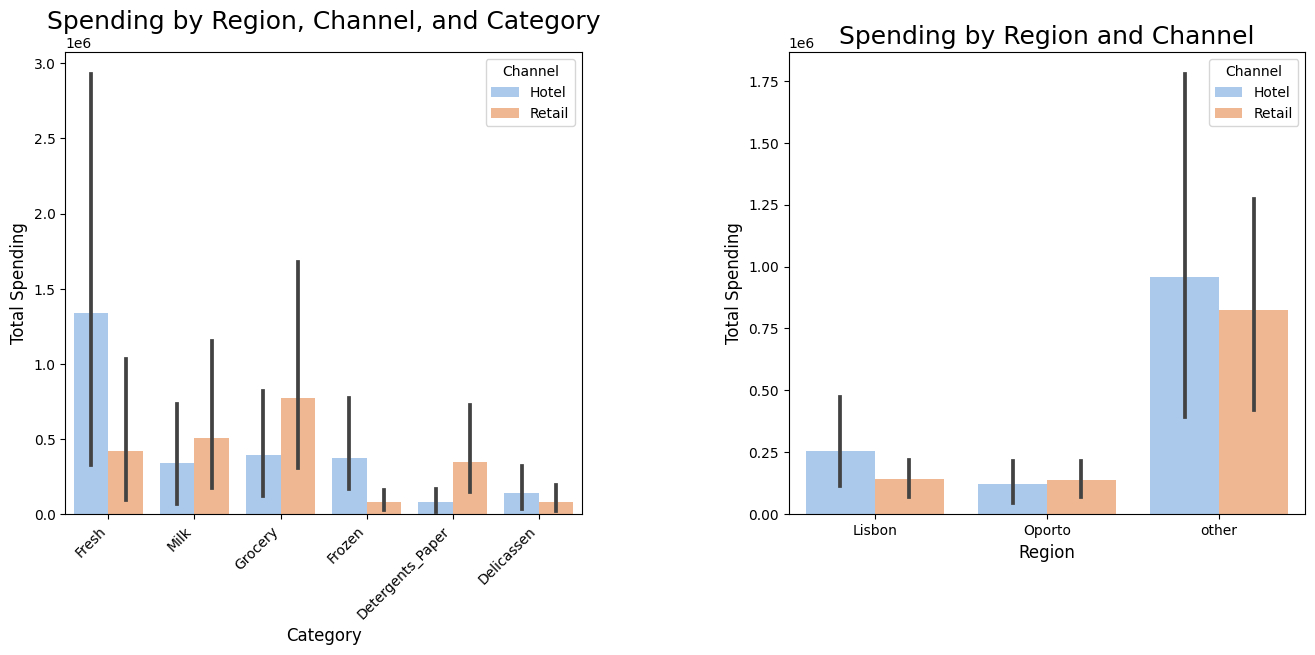

In [16]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create the grouped bar plot
sns.barplot(x='Category', y='Total_Spending', hue='Channel', data=filtered_summary, palette='pastel', ax=axes[0])
axes[0].set_title('Spending by Region, Channel, and Category', fontsize = 18)
axes[0].set_xlabel('Category', fontsize = 12)
axes[0].set_ylabel('Total Spending', fontsize = 12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Create the scatter plot
sns.barplot(data=filtered_summary, x='Region', y='Total_Spending', hue='Channel', palette='pastel', ax=axes[1])
axes[1].set_title('Spending by Region and Channel',fontsize = 18)
axes[1].set_xlabel('Region',fontsize = 12)
axes[1].set_ylabel('Total Spending', fontsize = 12)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the combined plot
plt.show()


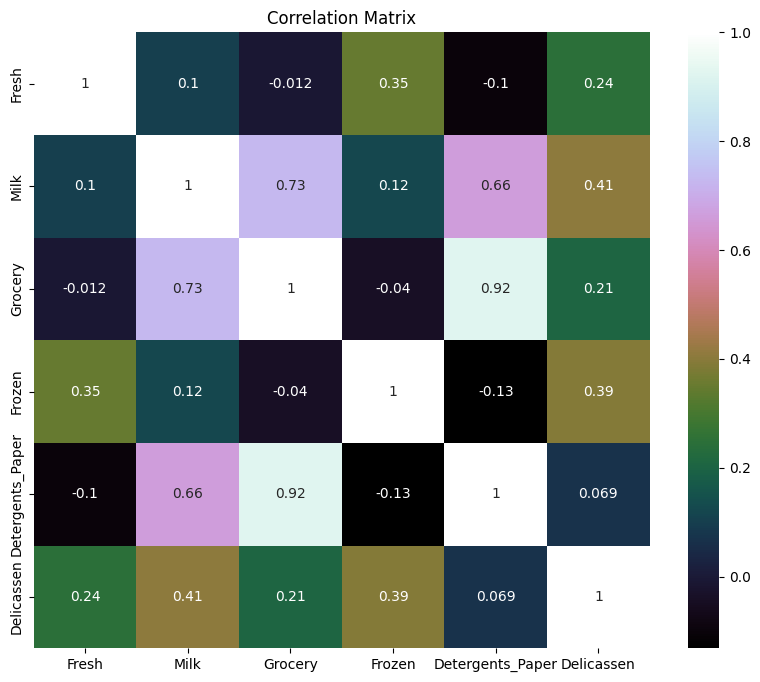

In [23]:
columns_to_remove = ['Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster', 'Channel', 'Region']  # Replace with the actual column names to remove
subset_df = wholesale_cust_data.drop(columns=columns_to_remove)


correlation_matrix = subset_df.corr()
correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation Matrix')
plt.show()


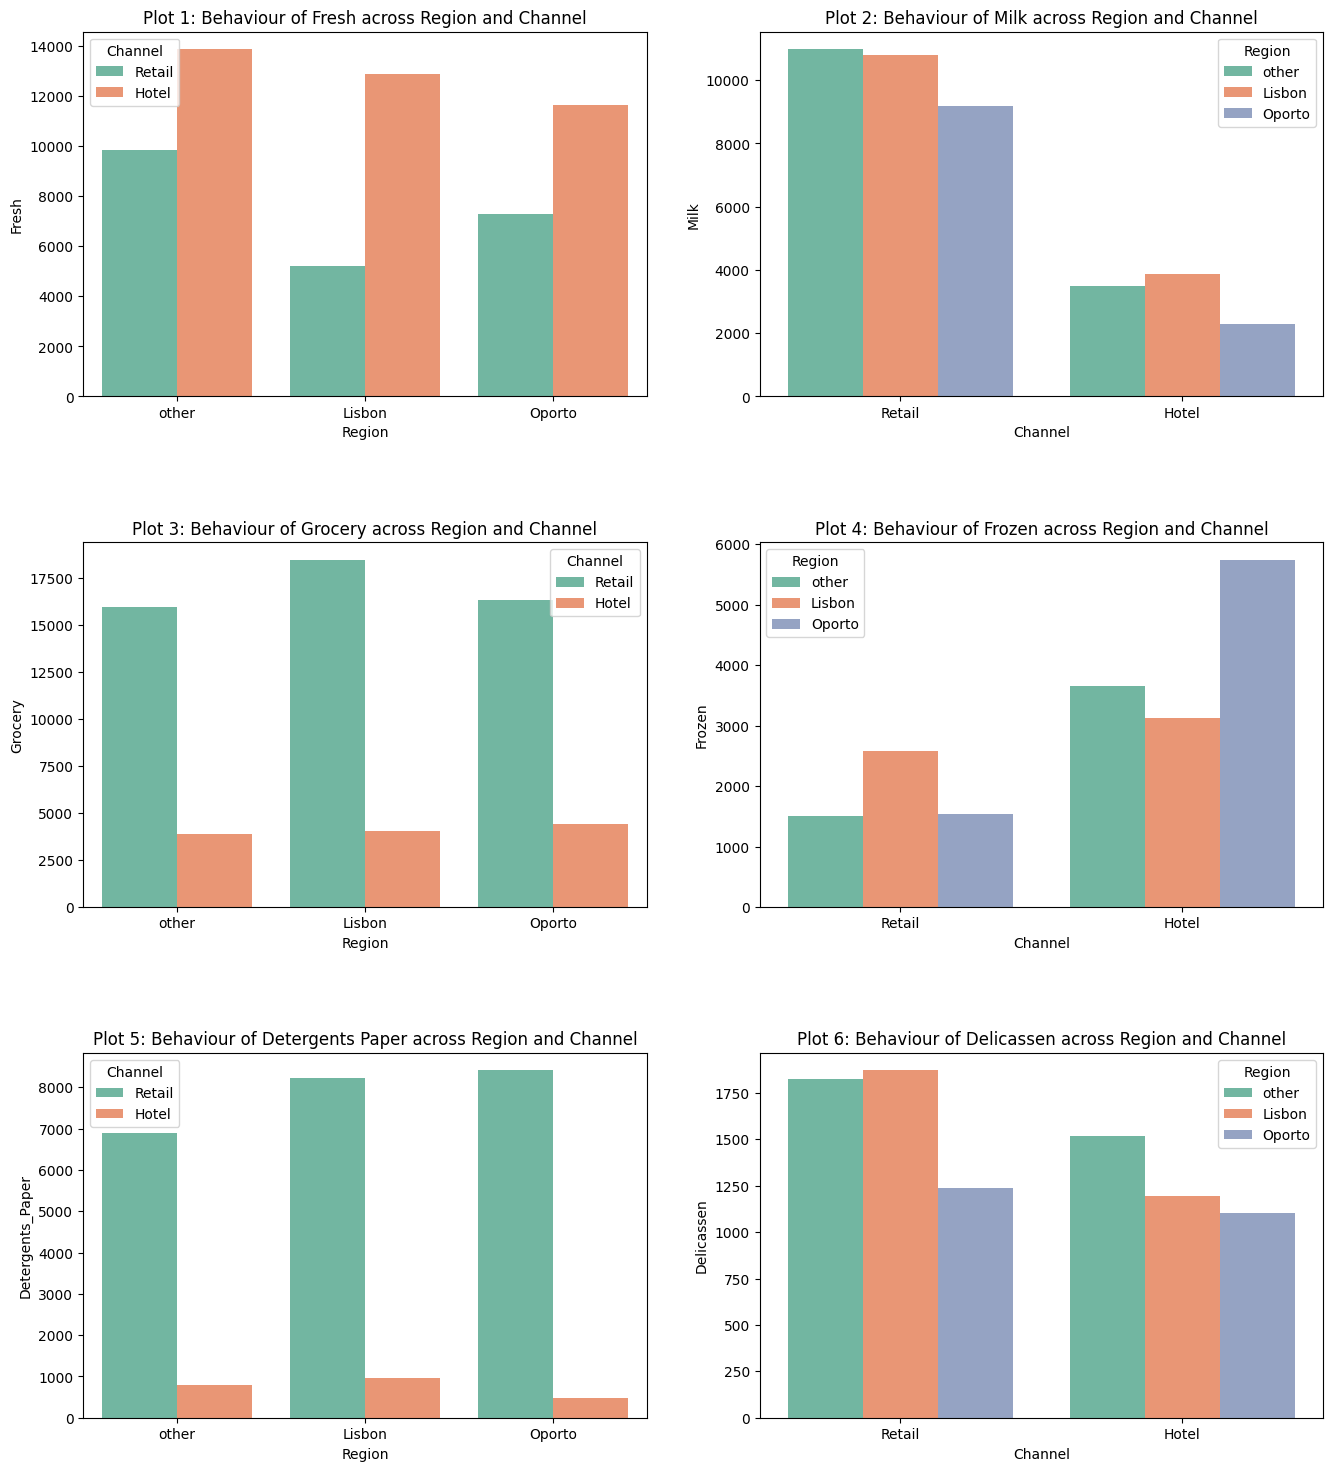

In [19]:
import matplotlib.pyplot as plt
import warnings

# Suppress warning messages
warnings.filterwarnings("ignore")


# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plot 1: Behaviour of Fresh across Region and Channel
sns.barplot(x="Region", y="Fresh", hue="Channel", data=wholesale_cust_data_subset, palette='Set2', ci=False, ax=axes[0, 0])
axes[0, 0].set_title('Plot 1: Behaviour of Fresh across Region and Channel')

# Plot 2: Behaviour of Milk across Region and Channel
sns.barplot(x="Channel", y="Milk", hue="Region", data=wholesale_cust_data_subset, palette='Set2', ci=False, ax=axes[0, 1])
axes[0, 1].set_title('Plot 2: Behaviour of Milk across Region and Channel')

# Plot 3: Behaviour of Grocery across Region and Channel
sns.barplot(x="Region", y="Grocery", hue="Channel", data=wholesale_cust_data_subset, palette='Set2', ci=False, ax=axes[1, 0])
axes[1, 0].set_title('Plot 3: Behaviour of Grocery across Region and Channel')

# Plot 4: Behaviour of Frozen across Region and Channel
sns.barplot(x="Channel", y="Frozen", hue="Region", data=wholesale_cust_data_subset, palette='Set2', ci=False, ax=axes[1, 1])
axes[1, 1].set_title('Plot 4: Behaviour of Frozen across Region and Channel')

# Plot 5: Behaviour of Detergents Paper across Region and Channel
sns.barplot(x="Region", y="Detergents_Paper", hue="Channel", data=wholesale_cust_data_subset, palette='Set2', ci=False, ax=axes[2, 0])
axes[2, 0].set_title('Plot 5: Behaviour of Detergents Paper across Region and Channel')

# Plot 6: Behaviour of Delicassen across Region and Channel
sns.barplot(x="Channel", y="Delicassen", hue="Region", data=wholesale_cust_data_subset, palette='Set2', ci=False, ax=axes[2, 1])
axes[2, 1].set_title('Plot 6: Behaviour of Delicassen across Region and Channel')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Display the combined plot
plt.show()
